# Reto 1 | NUWE: k-Nearest Neighbors

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Análisis exploratorio de datos

In [5]:
# Data sourcing
test_df = pd.read_csv("./Data/j0005_X_test.csv")
train_df = pd.read_csv("./Data/j0005_train.csv")
train_df.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
0,-1.338562,1.294711,2.618776,-3.956719,0.429189,-4.892338,1.909251,-1.354504,5.128878,-1.838382,0.707363,0.227852,9
1,5.554050,0.180810,1.178723,6.454313,2.813962,2.497290,2.488421,-1.414854,0.113383,13.802963,0.963402,-2.514901,1
2,-0.642079,-0.972673,0.036586,0.861405,0.217410,1.805510,0.421445,0.248682,-2.233864,0.259947,-1.001184,-0.538509,2
3,-3.562070,-2.186366,0.778240,2.785765,-1.024277,3.014388,2.484644,1.289673,-9.045247,-0.309358,1.939427,0.607276,6
4,-3.389951,-2.939251,1.030520,-3.364222,-0.684304,-2.912708,0.778325,-0.981265,1.965195,-4.052931,0.557587,0.073785,0
5,-1.196643,0.291564,3.309079,-0.359617,0.573168,0.444089,0.789075,-1.437335,1.327729,-1.422968,-0.508566,0.842883,5
6,2.842101,0.439146,1.798643,5.224235,-2.357394,2.996919,-0.378414,1.856353,-4.970673,3.919628,-0.257934,0.847310,3
7,-1.934587,-1.933466,-3.189730,-2.798518,-1.747793,0.545018,-0.102264,-0.384234,-1.753055,-5.515965,-1.399852,0.927111,0
8,-2.814748,-0.767736,4.156825,1.643332,-2.162120,2.354319,-0.040924,-1.663106,-2.813986,-4.959650,1.377413,-1.128451,8
9,0.808892,2.630093,1.959840,-1.199748,1.172692,1.219465,0.681531,-0.593256,1.835633,-0.801653,-0.072241,0.072039,0


A priori, los datasets parecen limpios y sin columnas a eliminar/modificar. Por el momento, no se tiene información detallada de cada *feature* ni de los tipos de *target*.

In [19]:
test_df.describe()
train_df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.177904,-0.313243,0.180818,-0.187802,-0.153803,-0.190837,0.235730,-0.092897,0.023577,-0.121721,0.013522,-0.008095,4.467143
std,1.986915,1.958347,1.928108,1.898506,1.880917,1.926885,1.887839,1.929879,3.458208,3.827377,0.968443,0.986876,2.866469
min,-7.422555,-6.474240,-6.934195,-7.070009,-6.295968,-6.803564,-5.928351,-8.734755,-12.273252,-18.841105,-3.074457,-3.380565,0.000000
25%,-1.525256,-1.668629,-1.090506,-1.505275,-1.442374,-1.497419,-1.059176,-1.359477,-2.243290,-2.507745,-0.637457,-0.657245,2.000000
50%,-0.205119,-0.268281,0.250243,-0.231760,-0.135744,-0.156827,0.179453,-0.088428,0.085190,-0.233494,0.015008,-0.023996,5.000000
75%,1.151332,1.061212,1.486098,1.066765,1.140301,1.124285,1.528412,1.183728,2.317565,2.247740,0.648216,0.676959,7.000000
max,6.853681,5.592336,6.610338,6.603456,6.788537,7.470066,6.265139,6.176870,12.661339,13.802963,3.242153,3.305525,9.000000


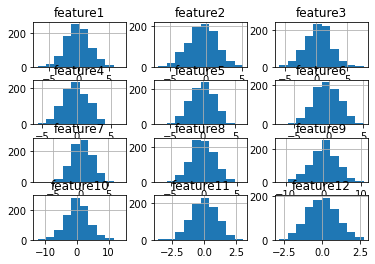

In [21]:
test_df.hist()
plt.show()

Se observa que ambos datasets siguen una distribución balanceada (exceptuando la columna de targets).

In [10]:
# Data cleaning - Handling missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
target       0
dtype: int64
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
dtype: int64


No hay *missing values* en los datasets.

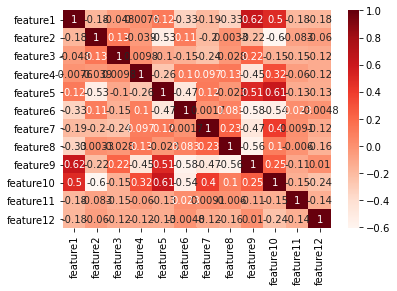

           feature1  feature2  feature3  feature4  feature5  feature6  \
feature1   1.000000  0.044264  0.047534  0.070604 -0.000865 -0.015427   
feature2   0.044264  1.000000  0.118949  0.021504 -0.172432 -0.006565   
feature3   0.047534  0.118949  1.000000  0.106677  0.022901 -0.016913   
feature4   0.070604  0.021504  0.106677  1.000000 -0.111138  0.056298   
feature5  -0.000865 -0.172432  0.022901 -0.111138  1.000000 -0.123924   
feature6  -0.015427 -0.006565 -0.016913  0.056298 -0.123924  1.000000   
feature7  -0.033475 -0.048959 -0.020697 -0.031099  0.112910 -0.000769   
feature8  -0.064527  0.032001  0.087618  0.007412  0.085548  0.011001   
feature9   0.468654 -0.120110  0.198363 -0.363297  0.386976 -0.390695   
feature10  0.515444 -0.291415  0.045212  0.399336  0.532262 -0.288762   
feature11 -0.004544 -0.017100  0.004685  0.007693  0.003817  0.019144   
feature12 -0.021769 -0.015129  0.004579 -0.015933 -0.005359  0.005725   

           feature7  feature8  feature9  feature10

In [17]:
# Data cleaning - Handling outliers
corr_train = train_df[['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11','feature12']].corr()


sns.heatmap(corr_train.corr(), annot=True, cmap = 'Reds')
plt.show()

print(corr_train)

### Task 2: Predicción empleando kNN